### <font color="blue"> Processing Car Damage Images using CAS image processing actions </font>

In [2]:
from swat import *
from pprint import pprint

%matplotlib inline
import matplotlib
import struct
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import cv2

def imageShow(casTable, imageId, nimages):
    a = s.table.fetch(sastypes=False,sortby=[{'name':'_id_'}],table=casTable,to=nimages)
    fig = plt.figure(figsize=(20, 20))
    for i in range(nimages):
        imageData = a['Fetch'].ix[ i][ imageId]
        img_np = cv2.imdecode(np.fromstring( imageData, np.uint8),1)
        fig.add_subplot(1,nimages,i+1)
        plt.imshow(img_np)
        img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
        plt.xticks([]), plt.yticks([])

In [3]:
s = CAS('gtpviyaea12.unx.sas.com', 5570, 'turtui', 'turtui1')
s.loadactionset('image')


NOTE: Added action set 'image'.


[actionset]

 'image'

+ Elapsed: 0.0717s, user: 0.016s, sys: 0.036s, mem: 0.138mb

### Load images and resize

NOTE: Loaded 4 images from /viyafiles/turtui/image_processing/car_accident into Cloud Analytic Services table inputTable.
NOTE: Table INPUTTABLE contains compressed images.
NOTE: 4 out of 4 images were processed successfully and saved as compressed images to the Cloud Analytic Services table inputTable_resized.


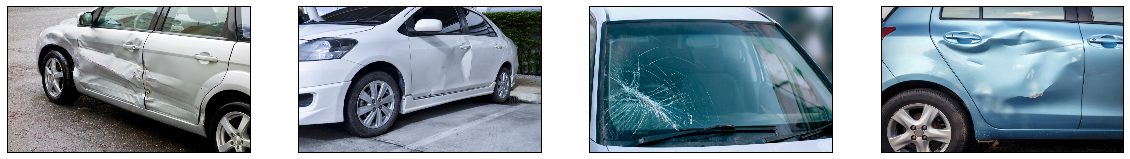

In [4]:
nimage = 4

s.image.loadImages(casout={'name':'inputTable', 'replace':True}, path='/viyafiles/turtui/image_processing/car_accident')
s.image.processimages(casout={'name':'inputTable_resized', 'replace':True},
                       imagefunctions=[{'functionoptions':{'width':1000,'functiontype':'RESIZE','height':600}}],imagetable={'name':'inputTable'})
imageTable = s.CASTable('inputTable_resized')
imageShow(imageTable, 0, nimage)

### Convert colours

NOTE: Table INPUTTABLE_RESIZED contains compressed images.
NOTE: 4 out of 4 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 0.13s, user: 0.157s, sys: 0.058s, mem: 196mb


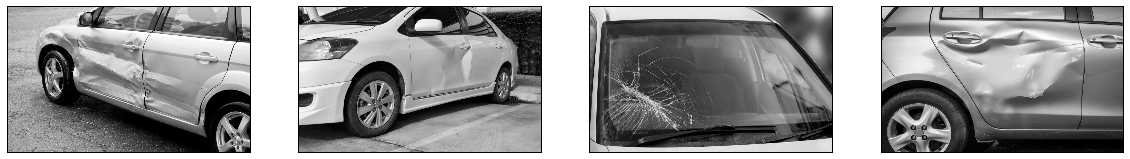

In [6]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'inputTable_resized'},
        imagefunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}} #change color space
    ])
print(r)
outTable = s.CASTable('resultingImages')
imageShow(outTable,0, nimage)

### Apply noise reduction and binarization

NOTE: Table INPUTTABLE_RESIZED contains compressed images.
NOTE: 4 out of 4 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 0.52s, user: 1.48s, sys: 0.021s, mem: 195mb


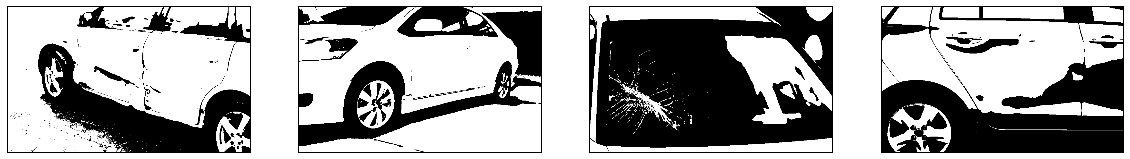

In [7]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'inputTable_resized'},
        imagefunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                        'diameter':13,'sigmacolor':30,'sigmaspace':30}},
        
            {'options':{'functiontype':'THRESHOLD', #image binarization
                        'type':'OTSU','value':125}}
    ])
print(r)
outTable = s.CASTable('resultingImages')
imageShow(outTable,0, nimage)

NOTE: Table INPUTTABLE_RESIZED contains compressed images.
NOTE: 4 out of 4 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 0.559s, user: 1.69s, sys: 0.045s, mem: 195mb


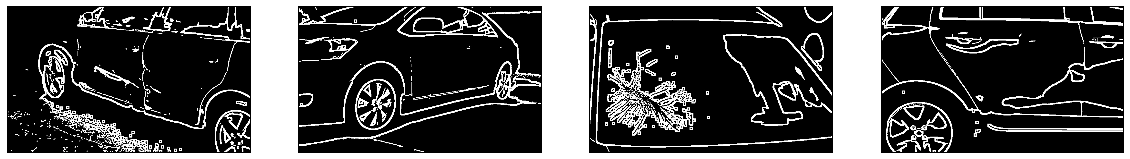

In [8]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'inputTable_resized'},
        imagefunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                        'diameter':13,'sigmacolor':30,'sigmaspace':30}},
        
            {'options':{'functiontype':'THRESHOLD', #image binarization
                        'type':'OTSU','value':125}},
            {'options':{'functiontype':'LAPLACIAN', #edge detection with the Laplace operator
                        'kernelsize':12}}
           
    ])
print(r)
outTable = s.CASTable('resultingImages')
imageShow(outTable,0, nimage)

In [7]:
outTable.head(4)

,_image_,_size_,_path_,_type_,_id_
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,167660,/viyafiles/turtui/image_processing/car_acciden...,jpg,1
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,118477,/viyafiles/turtui/image_processing/car_acciden...,jpg,4
2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,136005,/viyafiles/turtui/image_processing/car_acciden...,jpg,2
3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,152709,/viyafiles/turtui/image_processing/car_acciden...,jpg,3


NOTE: Table INPUTTABLE_RESIZED contains compressed images.
NOTE: 4 out of 4 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 0.66s, user: 1.76s, sys: 0.074s, mem: 196mb


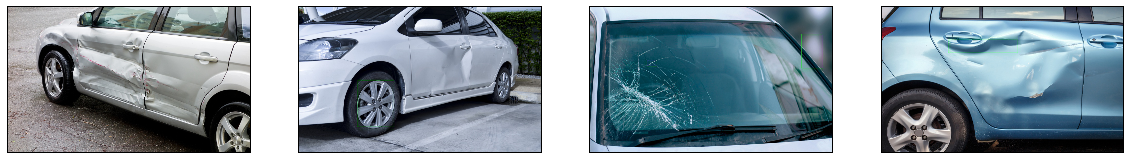

In [9]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'inputTable_resized'},
        imagefunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                        'diameter':13,'sigmacolor':30,'sigmaspace':30}},
        
            {'options':{'functiontype':'THRESHOLD', #image binarization
                        'type':'OTSU','value':125}},
            {'options':{'functiontype':'LAPLACIAN', #edge detection with the Laplace operator
                        'kernelsize':12}},
            {'options':{'functiontype':'CONTOURS', #contour detection and drawing
                                    'boundingbox':True,'approximate':True,'groupboxes':True}}])
           
    

print(r)
outTable = s.CASTable('resultingImages')
imageShow(outTable,0, nimage)


In [10]:
outTable.head(4)

,_image_,_size_,_path_,_type_,_id_
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,231580,/viyafiles/turtui/image_processing/car_acciden...,jpg,1
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,158297,/viyafiles/turtui/image_processing/car_acciden...,jpg,4
2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,193577,/viyafiles/turtui/image_processing/car_acciden...,jpg,2
3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,185664,/viyafiles/turtui/image_processing/car_acciden...,jpg,3


### Convert processed image file into a data matrix to run machine learning algorithms.. 
Potential use cases for fraud in claims, damage pricing for FNOL and automation in claims operations
- Unsupervised methods: Clustering images for finding similar categories of damage
- Supervised methods: Estimating the probability of write-off/the severity of the damage


In [8]:
import pandas as pd
import swat.datamsghandlers as dmh

def displayImagePair(binaries, width, height, i1, i2):
    image1 = bytearray(binaries[i1])
    image1 = np.reshape(image1, (height, width))
    image2 = bytearray(binaries[i2])
    image2 = np.reshape(image2, (height, width))
    fig = plt.figure(figsize = (10, 10./height*width))
    fig.add_subplot(121)
    plt.imshow(image1)
    plt.gray()
    plt.xticks([0, width], fontsize=15)
    plt.yticks([0, height], fontsize=15)
    fig.add_subplot(122)
    plt.imshow(image2)
    plt.gray()
    plt.xticks([0, width], fontsize=15)
    plt.yticks([0, height], fontsize=15)
    plt.show()
    
def ImageBinaries2Matrix(imageBinaries, nImages, nRows, nCols):
    images = np.empty((nImages, nRows*nCols))
    for i in range(nImages):
        images[i] = bytearray(imageBinaries[i])
    return images

def Matrix2CASTable(casSession, tableName, matrix, baseColName="c"):
    nRows, nCols = matrix.shape
    baseColName = baseColName.strip()
    colNames = [baseColName + str(i) for i in range(1, nCols + 1)]
    df = pd.DataFrame(matrix, columns=colNames)
    handler = dmh.PandasDataFrame(df)
    casSession.addtable(table=tableName.strip(), replace=True, **handler.args.addtable)
    
def CASTable2Matrix(casSession, tableName, fromRow, nRows, nCols, baseColName="c"):
    fetchedTable = casSession.fetch(table=tableName, sastypes=False, From=fromRow, to=fromRow+nRows-1)['Fetch']
    baseColName = baseColName.strip()
    colNames = [baseColName + str(i) for i in range(1, nCols + 1)]
    matrix = np.zeros((nRows, nCols))
    for i in range(nCols):
        matrix[:, i] = fetchedTable[colNames[i]]
    return matrix

import os,time
def get_information(directory):
    file_list = []
    for i in os.listdir(directory):
        a = os.stat(os.path.join(directory,i))
        file_list.append([i,time.ctime(a.st_mtime),time.ctime(a.st_ctime)]) #[file,most_recent_access,created]
    return file_list

NOTE: Table INPUTTABLE_RESIZED contains compressed images.
NOTE: 4 out of 4 images were processed successfully and saved as decompressed images to the Cloud Analytic Services table damage.


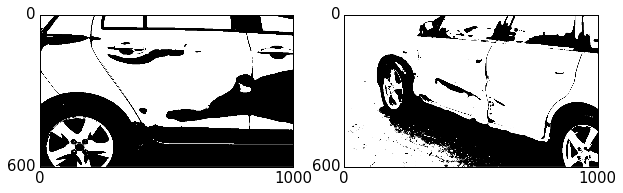

NOTE: Table DAMAGE contains decompressed images.
NOTE: 4 out of 4 images were processed successfully and saved as decompressed images to the Cloud Analytic Services table damage_low.


In [9]:
# Perform the 3 steps using processImages action
s.image.processImages(casout={'name':'damage','replace':True},imagetable={'name':'inputTable_resized'},
                      imagefunctions=[
                        {'options':{'functiontype':'CONVERT_COLOR'}},
                        {'options':{'functiontype':'BILATERAL_FILTER','diameter':13,'sigmacolor':30,'sigmaspace':30}},
                        {'options':{'functiontype':'THRESHOLD','type':'OTSU','value':125}}],
                      decode=True)

# Fetch and display representative images
fetchedImages=s.fetch(table='damage', sastypes=False, sortBy="_path_",
                      fetchVars={"_path_", "_resolution_", "_image_"}, to=4)['Fetch']
imageResolutions=fetchedImages["_resolution_"]
imageBinaries=fetchedImages["_image_"]
res = np.fromstring( imageResolutions[0], np.int64)
originalWidth = res[0]
originalHeight = res[1]
displayImagePair(imageBinaries, originalWidth, originalHeight, 1, 2)

# Downsampling
s.image.processImages(imageTable='damage', 
                      casOut=vl(name='damage_low', replace='TRUE'),
                      imageFunctions=[vl(functionOptions=vl(functionType="RESIZE", width=originalWidth/2, 
                                                            height=originalHeight/2)),
                                      vl(functionOptions=vl(functionType="THRESHOLD", type="BINARY", 
                                                            value=200))],
                      decode=True)

# Fetch image binaries, and related data
fetchedImages=s.fetch(table='damage_low', sastypes=False, sortBy="_path_",
                      fetchVars={"_path_", "_resolution_", "_image_"}, to=1000000)['Fetch']
imageResolutions=fetchedImages["_resolution_"]
imageBinaries=fetchedImages["_image_"]
res = np.fromstring( imageResolutions[0], np.int64)
width = res[0]
height = res[1]
nImages = len(imageBinaries)
#displayImagePair(imageBinaries, width, height, 1, 2)

### Creating image data matrix
#### Transforming each binary image into a row in a data matrix

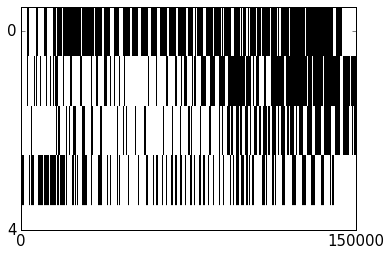

In [10]:
# Read the binary blob of each image and extract the pixel values into a matrix
damageMatrix = ImageBinaries2Matrix(imageBinaries, nImages, height, width)

# Display the matrix
fig = plt.figure()
plt.imshow(damageMatrix, interpolation='nearest', aspect='auto')
plt.xticks([0, height*width], fontsize=15)
plt.yticks([0, nImages], fontsize=15)
plt.show()

### Creating CAS table
No need to analyze columns with zero variance. Create CAS table using pandas library in Python, and addTable action

In [11]:
# Delete constant columns
# damageMatrix = np.delete(damageMatrix, np.where(np.all(damageMatrix==255, axis=0)), axis=1)
# damageMatrix = np.delete(damageMatrix, np.where(np.all(damageMatrix==0, axis=0)), axis=1)

# Convert data matrix into CAS table in the server using pandas and fetch action
Matrix2CASTable(s, 'damageTable', damageMatrix)
fetchedImages=s.fetch(table='damageTable', sastypes=False, to=4)['Fetch']

print(fetchedImages)

Selected Rows from Table DAMAGETABLE

      c1     c2     c3     c4     c5     c6     c7     c8     c9    c10  \
0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
2  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
3  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   

    ...     c149991  c149992  c149993  c149994  c149995  c149996  c149997  \
0   ...       255.0    255.0    255.0    255.0    255.0    255.0    255.0   
1   ...       255.0    255.0    255.0    255.0    255.0    255.0    255.0   
2   ...         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3   ...         0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   c149998  c149999  c150000  
0    255.0    255.0    255.0  
1    255.0    255.0    255.0  
2      0.0      0.0      0.0  
3      0.0      0.0      0.0  

[4 rows x 150000 columns]


## To be continued...
### Invoke PCA action and get scores for each image and run cluster analysis

In [ ]:
s.loadactionset('pca')
s.loadactionset('clustering')
nRows, nCols = damageMatrix.shape
print(nRows)
print(nCols)
         
#Call PCA action
s.pca.eig(table='damageTable',
          n=2, 
          output=vl(casOut=vl(name='pcaScores', replace='TRUE')),
          outStat=vl(casOut=vl(name='pcaStat', replace='TRUE')))

# # Retrieve results and calculate scores
# fromRow = nCols+5
# pcaaxes = np.transpose(CASTable2Matrix(s, 'pcaStat', 1, 2, nCols))
# scores = damageMatrix.dot(pcaaxes);

# # Plot scores
# from mpl_toolkits.mplot3d import Axes3D
# font = {'weight' : 'bold',
#         'size'   : 22}
# matplotlib.rc('font', **font)
# fig = plt.figure()
# r = plt.scatter(scores[:, 0], scores[:, 1], marker = 'o', c='b', s=80)
# fig.set_size_inches(8, 5)
# plt.subplots_adjust(bottom = 0.1)
# plt.xticks([-3000, 3000], fontsize=15)
# r = plt.yticks([-3000, 500], fontsize=15)
